## Variable Initialization and Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from eyeInfo import EyeInfo
import numpy as np

calib_points = [
    { "x": 200, "y": 200 },
    { "x": 1672, "y": 200 },
    { "x": 936, "y": 472 },
    { "x": 200, "y": 744 },
    { "x": 1672, "y": 744 },
]


eye = EyeInfo()

right = './csv/output/outright.csv'
left = './csv/output/outleft.csv'

right_df = pd.read_csv(right)
left_df = pd.read_csv(left)

calib_points_x, calib_points_y = eye.get_points(calib_points)

p_interest = 1
slice_size = 20

lim1 = (p_interest - 1) * slice_size
lim2 = p_interest * slice_size - 1
print(f"lim1: {lim1}")
print(f"lim2: {lim2}")


right_x = np.array((right_df['screen_x']).tolist()[lim1:lim2])
right_y = np.array((right_df['screen_y']).tolist()[lim1:lim2])
left_x = np.array((left_df['screen_x']).tolist()[lim1:lim2])
left_y = np.array((left_df['screen_y']).tolist()[lim1:lim2])
mean_x = np.array(((right_df['screen_x'] + left_df['screen_x']) / 2).tolist()[lim1:lim2])
mean_y = np.array(((right_df['screen_y'] + left_df['screen_y']) / 2).tolist()[lim1:lim2])

mean_x_flipped = -mean_x
right_x_flipped = -right_x
left_x_flipped = -left_x

mean_y_flipped = -mean_y
right_y_flipped = -right_y
left_y_flipped = -left_y

lim1: 0
lim2: 19


## Plotting data

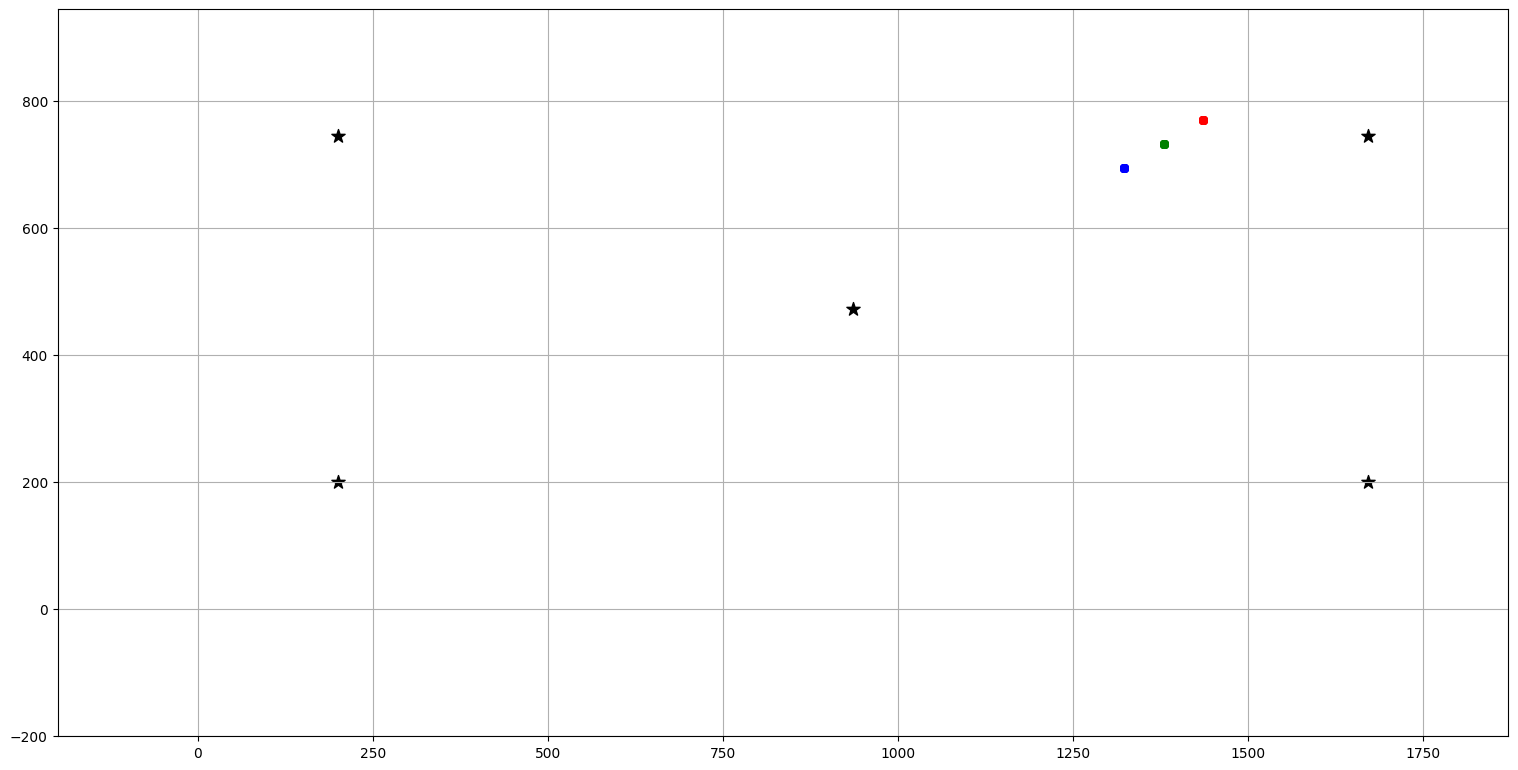

In [2]:
calib_colors= 'black'
marker_size = 30
star = 100
plt.scatter(calib_points_x, calib_points_y, marker="*", color=calib_colors,s=star ,label='calib points')

plt.scatter(mean_x_flipped, mean_y_flipped, marker='o', color='green',s=marker_size , label='mean points')
plt.scatter(mean_x, mean_y, marker='o', color='green',s=marker_size , label='mean points')

plt.scatter(right_x_flipped, right_y_flipped, marker='o', color='blue',s=marker_size , label='mean points')
plt.scatter(right_x, right_y, marker='o', color='blue',s=marker_size , label='mean points')

plt.scatter(left_x_flipped, left_y_flipped, marker='o', color='red',s=marker_size , label='mean points')
plt.scatter(left_x, left_y, marker='o', color='red',s=marker_size , label='mean points')


fig = plt.gcf()
fig.set_size_inches(eye.k_screen_width / 100, eye.k_screen_height / 100)

ax = plt.gca()
ax.set_xlim(-200, eye.k_screen_width)
ax.set_ylim(-200, eye.k_screen_height)

plt.grid(True)

plt.show()